In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [167]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

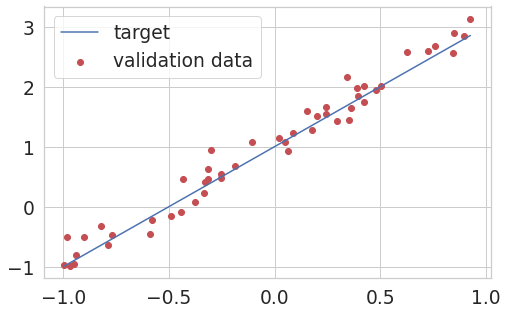

In [169]:
# plot validation and target dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import seaborn as sns

sns.set_theme(font_scale=1.7, style='whitegrid')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [7]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [164]:
sigma   = [0.2, 0.4, 0.6, 0.8, 1.0]
Nepochs = [2, 10, 20, 50, 100]
Ntrain  = [50, 100, 500, 1000, 2000]

In [ ]:
#Per ora non si vedono i log di keras perché ho commentato e scommentato la cella
#Se li avessi lasciati ci sarebbero state numerose righe di output

train_loss = np.zeros((5, 5))
test_loss  = np.zeros((5, 5))

for epoc in Nepochs:
    print("25 run per esplorare il caso Nepochs=", epoc)
    for i in tqdm(range(5)):
        for j in range(5):
            x_train = np.random.uniform(-1, 1, Ntrain[i])
            x_valid = np.random.uniform(-1, 1, 50)
            x_valid.sort()
            y_target = m * x_valid + b 

            sig = 0.2*j

            y_train = np.random.normal(m * x_train + b, sig) 
            y_valid = np.random.normal(m * x_valid + b, sig)
            
            # per ricominciare da capo il training ogni volta devo definire da zero la rete
            # così posso vedere il risultato ottenuto con numeri variabili di epoche
            # il primo ciclo è sulle epoche, il secondo su Ntrain, il terzo sulla sigma 
            # sto allenando un totale di 225 reti diverse
            
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,)))
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

            history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=epoc,
                  shuffle=True, 
                  validation_data=(x_valid, y_valid), verbose=0)

            train_loss[i][j] = history.history['mse'][epoc-1]
            test_loss[i][j]  = history.history['val_mse'][epoc-1]
            
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.heatmap(test_loss, annot=True, ax=ax, cmap="coolwarm", xticklabels=sigma, 
                    vmin=0, vmax=1, yticklabels=Ntrain)
    ax.set_title("Test MSE al variare di $\sigma$ e $N_{TRAIN}$, caso "+str(epoc)+" epoche")
    ax.set_ylabel("$N_{train}$")
    ax.set_xlabel("$\sigma$")
    plt.savefig("Results/heatmap_"+str(epoc)+".png")
    plt.show(False)

<img src="nn_analysis.gif">

## Seconda parte

In [305]:
newmodel = tf.keras.Sequential()
newmodel.add(Dense(units=8, input_shape=(1,), activation='linear'))
newmodel.add(Dense(units=16, activation='relu'))
newmodel.add(Dense(units=16, activation='relu'))
newmodel.add(Dense(units=1, activation='linear'))
newmodel.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [306]:
newmodel.summary()

Model: "sequential_589"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_671 (Dense)            (None, 8)                 16        
_________________________________________________________________
dense_672 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_673 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_674 (Dense)            (None, 1)                 17        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [307]:
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

In [308]:
x_train = np.random.uniform(-10,10,2000)
x_test  = np.random.uniform(-10,10,300)
x_test.sort()

y_target  = f(x_test)

y_train = np.random.normal(f(x_train), 150)
y_test  = np.random.normal(f(x_test), 150)

In [309]:
#stesso discorso fatto per la cella del fit precedente

hist = newmodel.fit(x=x_train, y=y_train, 
              batch_size=20, epochs=300, 
              validation_data=(x_test, y_test), verbose=1)

Epoch 1/300
100/100 [==============================] - 1s 3ms/step - loss: 1297961.6250 - mse: 1297961.6250 - val_loss: 1228292.7500 - val_mse: 1228292.7500
Epoch 2/300
100/100 [==============================] - 0s 2ms/step - loss: 1251158.0000 - mse: 1251158.0000 - val_loss: 1129868.3750 - val_mse: 1129868.3750
Epoch 3/300
100/100 [==============================] - 0s 2ms/step - loss: 1045340.8750 - mse: 1045340.8750 - val_loss: 808895.8125 - val_mse: 808895.8125
Epoch 4/300
100/100 [==============================] - 0s 2ms/step - loss: 643972.3750 - mse: 643972.3125 - val_loss: 419570.2188 - val_mse: 419570.2188
Epoch 5/300
100/100 [==============================] - 0s 2ms/step - loss: 355258.5625 - mse: 355258.5625 - val_loss: 253829.4062 - val_mse: 253829.4062
Epoch 6/300
100/100 [==============================] - 0s 2ms/step - loss: 257359.0469 - mse: 257359.0469 - val_loss: 217996.4844 - val_mse: 217996.4844
Epoch 7/300
100/100 [==============================] - 0s 2ms/step - los

100/100 [==============================] - 0s 3ms/step - loss: 165857.1875 - mse: 165857.1875 - val_loss: 148198.4844 - val_mse: 148198.4844
Epoch 55/300
100/100 [==============================] - 0s 3ms/step - loss: 162936.3438 - mse: 162936.3438 - val_loss: 144320.7188 - val_mse: 144320.7188
Epoch 56/300
100/100 [==============================] - 0s 2ms/step - loss: 158554.9688 - mse: 158554.9688 - val_loss: 140899.7656 - val_mse: 140899.7656
Epoch 57/300
100/100 [==============================] - 0s 2ms/step - loss: 155133.1562 - mse: 155133.1562 - val_loss: 137256.5312 - val_mse: 137256.5312
Epoch 58/300
100/100 [==============================] - 0s 3ms/step - loss: 150825.5312 - mse: 150825.5312 - val_loss: 133665.0469 - val_mse: 133665.0469
Epoch 59/300
100/100 [==============================] - 0s 2ms/step - loss: 146853.1250 - mse: 146853.1250 - val_loss: 131173.9531 - val_mse: 131173.9531
Epoch 60/300
100/100 [==============================] - 0s 2ms/step - loss: 142623.5156 -

100/100 [==============================] - 0s 2ms/step - loss: 26868.8535 - mse: 26868.8535 - val_loss: 26618.5684 - val_mse: 26618.5684
Epoch 109/300
100/100 [==============================] - 0s 2ms/step - loss: 27006.5703 - mse: 27006.5684 - val_loss: 25649.0449 - val_mse: 25649.0449
Epoch 110/300
100/100 [==============================] - 0s 2ms/step - loss: 26351.3301 - mse: 26351.3301 - val_loss: 27028.0234 - val_mse: 27028.0234
Epoch 111/300
100/100 [==============================] - 0s 2ms/step - loss: 26278.6836 - mse: 26278.6836 - val_loss: 24474.6934 - val_mse: 24474.6934
Epoch 112/300
100/100 [==============================] - 0s 2ms/step - loss: 25996.7773 - mse: 25996.7773 - val_loss: 24272.6582 - val_mse: 24272.6582
Epoch 113/300
100/100 [==============================] - 0s 2ms/step - loss: 26036.0137 - mse: 26036.0137 - val_loss: 24339.6230 - val_mse: 24339.6230
Epoch 114/300
100/100 [==============================] - 0s 2ms/step - loss: 25636.2559 - mse: 25636.2559 - 

100/100 [==============================] - 0s 2ms/step - loss: 23081.0156 - mse: 23081.0156 - val_loss: 20906.3223 - val_mse: 20906.3242
Epoch 163/300
100/100 [==============================] - 0s 2ms/step - loss: 22968.0527 - mse: 22968.0527 - val_loss: 21419.9668 - val_mse: 21419.9668
Epoch 164/300
100/100 [==============================] - 0s 2ms/step - loss: 23148.7402 - mse: 23148.7402 - val_loss: 20615.5547 - val_mse: 20615.5547
Epoch 165/300
100/100 [==============================] - 0s 2ms/step - loss: 23063.9453 - mse: 23063.9453 - val_loss: 21182.5156 - val_mse: 21182.5156
Epoch 166/300
100/100 [==============================] - 0s 2ms/step - loss: 23079.0996 - mse: 23079.0996 - val_loss: 21658.9258 - val_mse: 21658.9238
Epoch 167/300
100/100 [==============================] - 0s 2ms/step - loss: 23164.9453 - mse: 23164.9453 - val_loss: 21522.8359 - val_mse: 21522.8359
Epoch 168/300
100/100 [==============================] - 0s 2ms/step - loss: 23356.0332 - mse: 23356.0332 - 

100/100 [==============================] - 0s 2ms/step - loss: 23139.3184 - mse: 23139.3184 - val_loss: 21542.6016 - val_mse: 21542.6016
Epoch 217/300
100/100 [==============================] - 0s 2ms/step - loss: 23009.9883 - mse: 23009.9922 - val_loss: 21517.2754 - val_mse: 21517.2754
Epoch 218/300
100/100 [==============================] - 0s 2ms/step - loss: 23014.8281 - mse: 23014.8281 - val_loss: 21895.2520 - val_mse: 21895.2520
Epoch 219/300
100/100 [==============================] - 0s 2ms/step - loss: 22994.7520 - mse: 22994.7520 - val_loss: 21056.3828 - val_mse: 21056.3828
Epoch 220/300
100/100 [==============================] - 0s 2ms/step - loss: 22997.6875 - mse: 22997.6875 - val_loss: 21859.6641 - val_mse: 21859.6641
Epoch 221/300
100/100 [==============================] - 0s 2ms/step - loss: 23113.5684 - mse: 23113.5684 - val_loss: 21451.3008 - val_mse: 21451.3008
Epoch 222/300
100/100 [==============================] - 0s 2ms/step - loss: 22882.2051 - mse: 22882.2070 - 

100/100 [==============================] - 0s 2ms/step - loss: 22917.4531 - mse: 22917.4531 - val_loss: 21463.9316 - val_mse: 21463.9316
Epoch 271/300
100/100 [==============================] - 0s 2ms/step - loss: 22827.7012 - mse: 22827.7012 - val_loss: 21923.8125 - val_mse: 21923.8125
Epoch 272/300
100/100 [==============================] - 0s 2ms/step - loss: 22776.6191 - mse: 22776.6211 - val_loss: 20904.7441 - val_mse: 20904.7441
Epoch 273/300
100/100 [==============================] - 0s 2ms/step - loss: 23039.9805 - mse: 23039.9805 - val_loss: 21027.3711 - val_mse: 21027.3711
Epoch 274/300
100/100 [==============================] - 0s 2ms/step - loss: 22981.3672 - mse: 22981.3672 - val_loss: 21381.8848 - val_mse: 21381.8848
Epoch 275/300
100/100 [==============================] - 0s 2ms/step - loss: 23077.7324 - mse: 23077.7324 - val_loss: 21522.5449 - val_mse: 21522.5449
Epoch 276/300
100/100 [==============================] - 0s 2ms/step - loss: 22904.9004 - mse: 22904.9004 - 

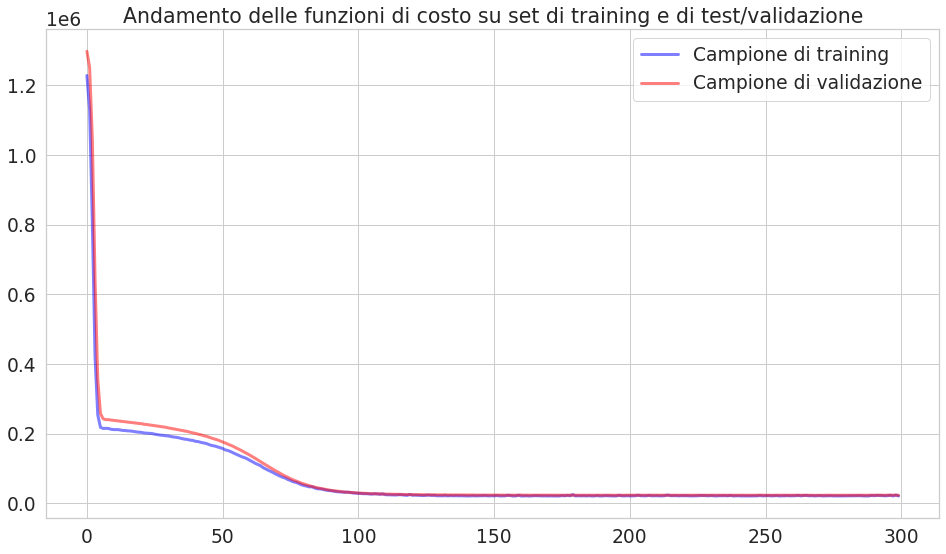

In [312]:
plt.figure(figsize=(16,9))
plt.title("Andamento delle funzioni di costo su set di training e di test/validazione")
plt.plot(hist.history['val_loss'], label='Campione di training', linewidth=3, alpha=0.5, color='blue')
plt.plot(hist.history['loss'], label='Campione di validazione', linewidth=3, alpha=0.5, color='red')
plt.legend()
plt.show()

### Genero dati del tutto nuovi in x

In [314]:
x_new = np.random.uniform(-10,10,500)
x_sort = x_new.sort()
y_new = newmodel.predict(x_new)
y_tru = f(x_new)

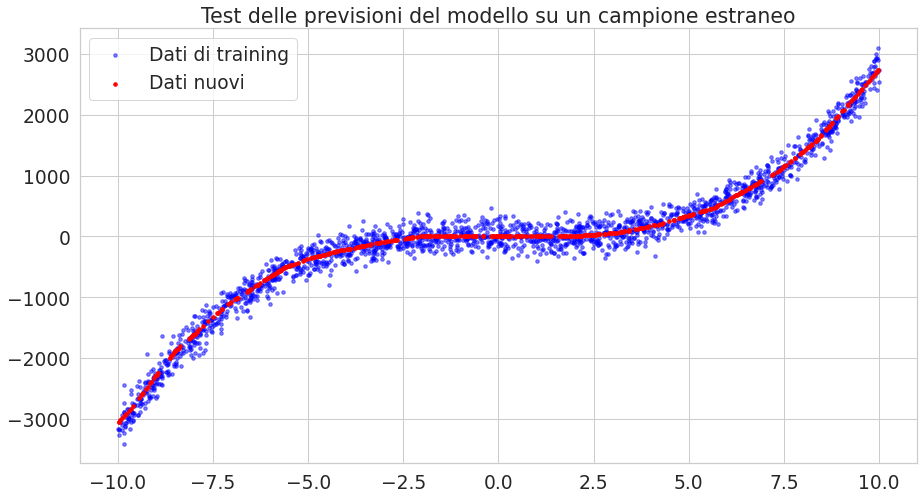

In [315]:
plt.figure(figsize=(15,8))
plt.title('Test delle previsioni del modello su un campione estraneo')
plt.scatter(x_train, y_train, alpha= 0.5, label='Dati di training', marker='.', s=50, color='blue')
#plt.scatter(x_new, y_tru, marker='.', linestyle='-', s=10, color='black', label='Andamento teorico', alpha=0.4)
plt.scatter(x_new, y_new, alpha=1, label='Dati nuovi', marker='.', s=50, color='red')

plt.legend()
plt.show()

## Parte tre

In [322]:
def g(x,y):
    return np.sin(x**2+y**2)


np.random.seed(0)

x_train = np.zeros((10000, 2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 10000)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 10000)

x_new = np.zeros((5000, 2))
x_new[:,0] = np.random.uniform(-1.5, 1.5, 5000)
x_new[:,1] = np.random.uniform(-1.5, 1.5, 5000)

x_valid = np.zeros((1000,2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 1000)

et = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2)

sigma = 0.1
z_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

In [323]:
model3 = tf.keras.Sequential()
model3.add(Dense(units=6, input_shape=(2,), activation='linear'))
model3.add(Dense(units=10, activation='relu'))
model3.add(Dense(units=10, activation='relu'))
model3.add(Dense(units=1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])
model3.summary()

Model: "sequential_591"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_679 (Dense)            (None, 6)                 18        
_________________________________________________________________
dense_680 (Dense)            (None, 10)                70        
_________________________________________________________________
dense_681 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_682 (Dense)            (None, 1)                 11        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [324]:
hist3 = model3.fit(x=x_train, y=z_train, 
              batch_size=32, epochs=100, 
              validation_data=(x_valid, z_valid), shuffle=True)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2390 - mse: 0.2390 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1186 - mse: 0.1186 - val_loss: 0.0980 - val_mse: 0.0980
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - mse: 0.0811 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - 

313/313 [==============================] - 1s 2ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 63/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 64/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 65/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 66/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 67/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 68/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 69/100
313/313 [==============================] - 1s 2ms/step - loss:

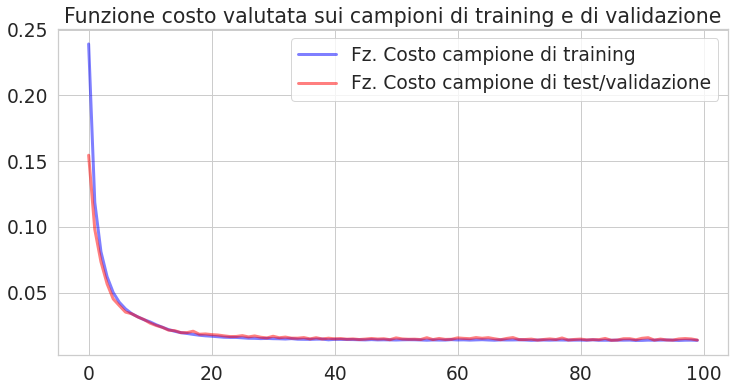

In [336]:
plt.figure(figsize=(12,6))
plt.title('Funzione costo valutata sui campioni di training e di validazione')
plt.plot(hist3.history['loss'], linewidth=3, alpha=0.5, color='blue', label='Fz. Costo campione di training')
plt.plot(hist3.history['val_loss'], linewidth=3, alpha=0.5, color='red', label='Fz. Costo campione di test/validazione')
plt.legend()
plt.show()

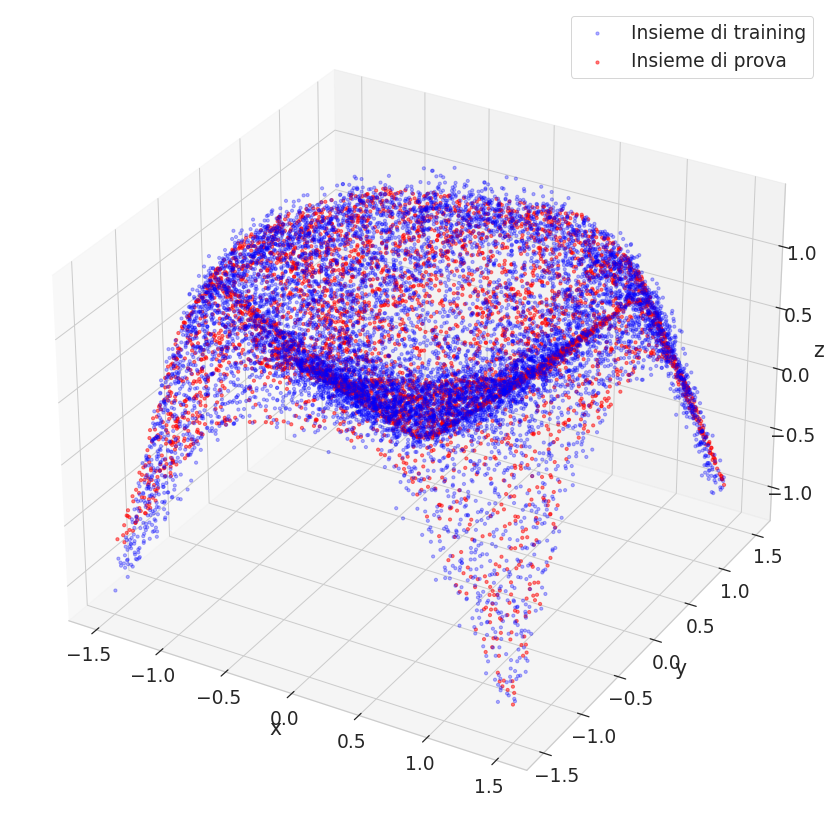

In [337]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter3D(x_train[:,0], x_train[:,1], z_train, color='blue', alpha=0.3, s = 10, label='Insieme di training')
ax.scatter3D(x_new[:,0], x_new[:,1], model3.predict(x_new), color='red', alpha=0.5, s = 10, label='Insieme di prova')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()